In [1]:
#Importing Required Libraries
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
with open('dataset_dict.pickle', 'rb') as file:
    dataset_dict = pickle.load(file)

In [3]:
X_train = dataset_dict['X_train']
y_train = dataset_dict['y_train']
X_test = dataset_dict['X_test']
y_test = dataset_dict['y_test']

## KNN classifier

In [4]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.885


In [5]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       521
         1.0       0.86      0.15      0.26        79

    accuracy                           0.89       600
   macro avg       0.87      0.57      0.60       600
weighted avg       0.88      0.89      0.85       600



## SVM classifier

In [6]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.885


In [7]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       521
         1.0       0.86      0.15      0.26        79

    accuracy                           0.89       600
   macro avg       0.87      0.57      0.60       600
weighted avg       0.88      0.89      0.85       600



## RandomForest Classifier

In [8]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9116666666666666


In [9]:
model_rf.predict([[0, 36, 62, 0, 0, 148.35, 12.2, 16.81, 82, 1, 4, 1]])

array([1.])

In [10]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       521
         1.0       0.80      0.44      0.57        79

    accuracy                           0.91       600
   macro avg       0.86      0.71      0.76       600
weighted avg       0.90      0.91      0.90       600



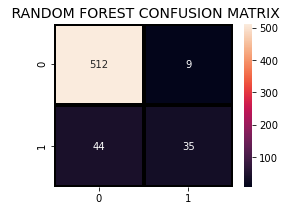

In [11]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

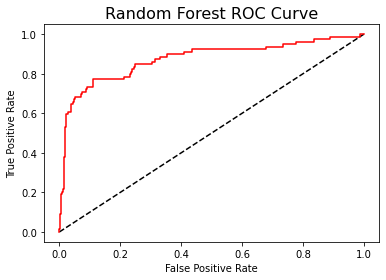

In [12]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

### Logistic Regression

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8816666666666667


In [14]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       521
         1.0       0.75      0.15      0.25        79

    accuracy                           0.88       600
   macro avg       0.82      0.57      0.59       600
weighted avg       0.87      0.88      0.85       600



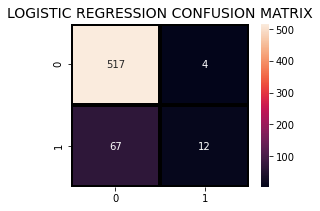

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

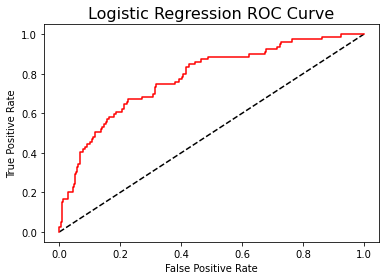

In [16]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### Decision Tree Classifier

In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8716666666666667


In [18]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       521
         1.0       0.51      0.57      0.54        79

    accuracy                           0.87       600
   macro avg       0.72      0.74      0.73       600
weighted avg       0.88      0.87      0.87       600



### Adaboost Classifier

In [19]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8716666666666667

In [20]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       521
         1.0       0.52      0.28      0.36        79

    accuracy                           0.87       600
   macro avg       0.71      0.62      0.65       600
weighted avg       0.85      0.87      0.85       600



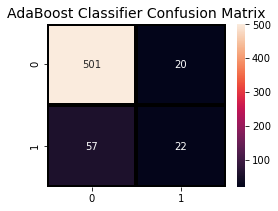

In [21]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### Gradientboost classifier

In [22]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier 0.9116666666666666


 - The performance looks similar to that of RandomForest

In [23]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       521
         1.0       0.75      0.49      0.60        79

    accuracy                           0.91       600
   macro avg       0.84      0.73      0.77       600
weighted avg       0.90      0.91      0.90       600



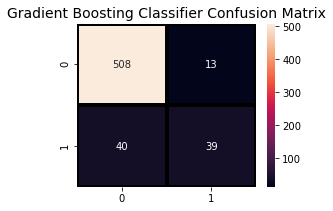

In [24]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

### Since, randomforest and gradient boosting classifier has best and almost equal performances, we'll serialize randomforest model

In [25]:
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

In [26]:
with open('model_rf.pkl', 'rb') as file:
    model = pickle.load(file)

In [27]:
model.predict([[0, 36, 62, 0, 0, 148.35, 12.2, 16.81, 82, 1, 4, 1]])

array([1.])

In [28]:
with open('standardization_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)